# **Previsão do Preço de Imóveis no município do Rio de Janeiro**

O projeto desse curso é desenvolver um modelo de Machine Learning utilizando a técnica de Regressão Linear, visando obter um modelo de previsão do preço de imóveis no município do Rio de Janeiro baseado nos seguintes parâmetros: área, distância do imóvel até a praia (km) e distância do imóvel até a farmácia mais próxima (km), sendo ambas as distâncias consideradas em linha reta.

## Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd

# Visualização de dados
import seaborn as sns

# Funções matemáticas
import numpy as np

# Machine Learning
# Separar os dados de treino e de teste
from sklearn.model_selection import train_test_split
# Estimar modelos estatísticos
import statsmodels.api as sm
# Regressão linear
from sklearn.linear_model import LinearRegression
# Gerar as métricas do modelo
from sklearn import metrics

# Remover os avisos
import warnings
warnings.filterwarnings('ignore')

# Salavar o modelo criado
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Configuração de estilo da biblioteca seaborn

In [2]:
# palette
sns.set_palette('Accent')

# style
sns.set_style('darkgrid')

## Importando os dados

In [3]:
dados = pd.read_csv('dataset.csv', sep=';')

## Visualizando os dados

In [4]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [5]:
# Tamanho do dataset
dados.shape

(5000, 4)

O dataset apresenta informações acerca de 5000 imóveis que estão disponíveis para venda no Rio de Janeiro.

## Análises Preliminares

### Estatísticas descritivas

In [6]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


### Matriz de correlação

**O que é uma matriz de correlação?**

Iniciando com o conceito de correlação, que é uma associação estatística que avalia o grau pelo qual um par de variáveis estão linearmente relacionadas. A correlação pode ser positiva (o aumento de uma variável é acompanhado do aumento da outra) ou negativa (o aumento de uma variável é acompanhado da diminuição da outra), sendo que o valores variam de -1 a +1. Então, a matriz de correlação tem a finalidade de entender as relações entre variáveis e é fundamental que faça parte da análise exploratória.

Fonte: https://www.numerapeopleanalytics.com/blog/tutorial-matriz-de-correlao

In [7]:
# Criando a matriz
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


Analisando a matriz de correlação vemos que uma forte associação positiva entre o valor e a área, uma considerável associação negativa entre valor e distância até a praia e uma associação negativa baixa entre valor e distância até a farmácia. O motivo da diagonal da matriz apresentar correlação igual a 1.0 é por conta de estar avaliando uma variável com ela mesma, por isso, indica que há uma associação perfeitamente positiva.

## Comportamento da Variável Dependente (y)

### Box plot da variável dependente (y)

**Box plot**

Analisando o boxplot obtém-se as seguintes informações do conjunto de dados: mediana, primeiro quartil, terceiro quartil, menor valor e maior valor.

Com o boxplot visualiza-se o centro, a dispersão e a assimetria de um conjunto de dados. Também é muito útil para identificar e controlar valores extremos, que são os chamados outliers, e para identificar o valor que melhor representa os dados, que é a mediana. Outra função dele é comparar diferentes distribuições dados.

Fonte: https://oestatistico.com.br/boxplot-a-caixa-magica/

Text(0.5, 0, 'Reais')

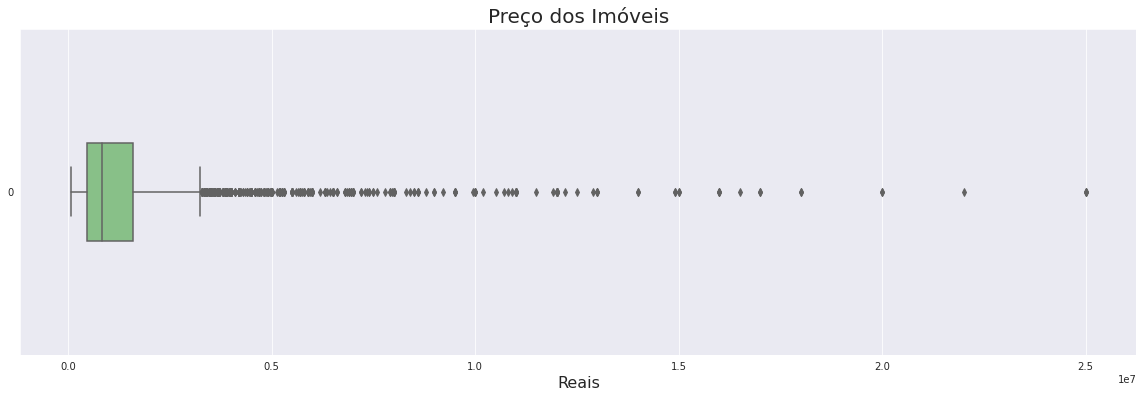

In [8]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)

Analisando o box plot tem-se que a maior concentração de valor dos imóveis está nos valores mais baixos e que existe uma quantidade considerável de outliers.

## Distribuição de Frequências

### Distribuição de frequências da variável dependente (y)

**Histograma**

O histograma é um gráfico de barras que demonstra a distribuição de frequências, no qual a base das barras representa uma classe e a altura a quantidade ou frequência absoluto com que o valor de cada classe ocorre. É usado para dados contínuos, diferentemente, de um gráfico de barras e é útil porque facilita muito a visualização, mostrando de forma visual onde a maioria dos valores se concentram e como se da a distribuição dos dados.

Fonte: https://www.alura.com.br/artigos/o-que-e-um-histograma

Text(0.5, 0, 'Preço dos Imóveis')

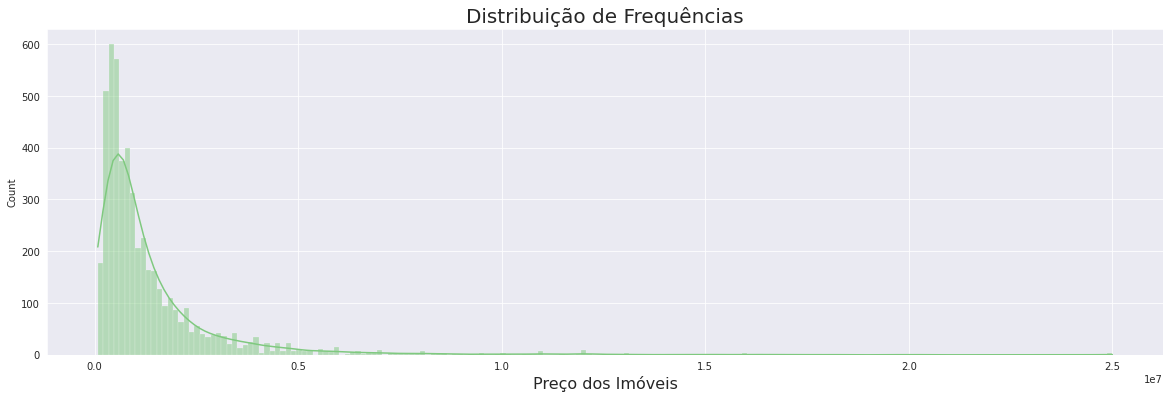

In [9]:
ax = sns.histplot(dados['Valor'], kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis', fontsize=16)

O histograma apresenta distorção à direita, indicando que há maior concentração dos dados em valores mais baixos, o que já havia sido observado no box plot.

## Gráficos de dispersão entre as variáveis do dataset

### pairplot

Plota o relacionamento entre pares de variáveis em um dataset.

Text(0.5, 1.05, 'Dispersão entre as Variáveis')

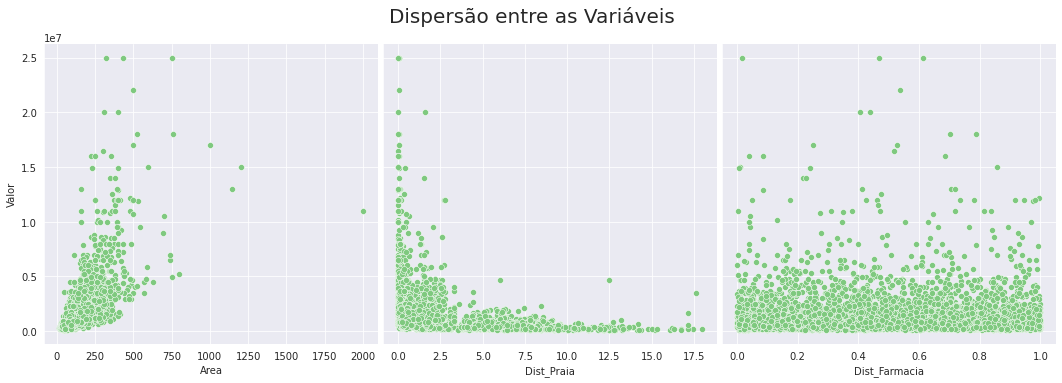

In [10]:
ax = sns.pairplot(data=dados, x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], y_vars='Valor', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

Adicionando uma estimativa da reta de regressão.

Text(0.5, 1.05, 'Dispersão entre as Variáveis')

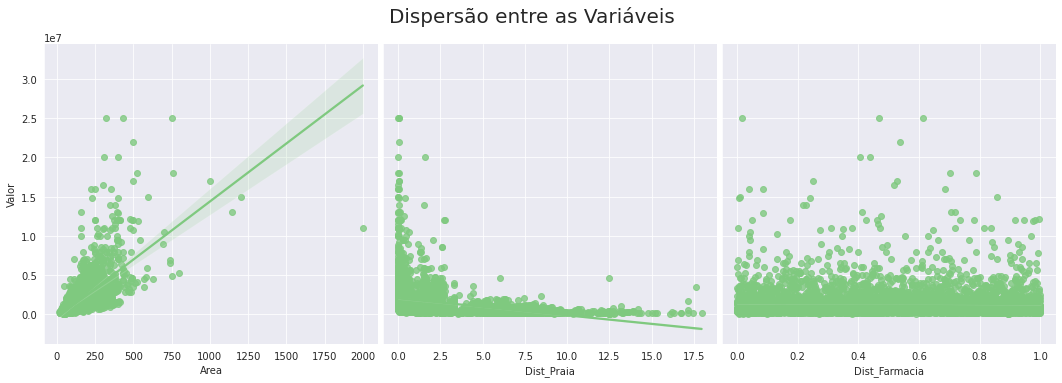

In [11]:
ax = sns.pairplot(data=dados, x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], y_vars='Valor', kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

Analisando os pairplots vemos que a reta de regressão não se ajusta bem aos dados, por isso, será necessário fazer uma transformação nesses dados.

## Transformando os Dados

### Distribuição Normal

É necessário transformar os dados para que eles tenham uma distribuição normal, porque os testes paramétricos assumem que os dados amostrais foram coletados de um população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal.


**O que são testes paramétricos?**

São uma ferramenta estatística usada para análises de fatores populacionais. O método requer a especificação da forma de distribuição da população que deu origem a amostra, geralmente, quando se trata de grandes amostrar, é uma distribuição normal.

Os testes paramétricos devem atender algumas condições. São elas: normalidade, a amostra deve ser considerada normal e, para verificar se essa consideração pode ser feita, são feitos testes de adequação que verificam quanto as observações diferem dos valores esperados; uniformidade, os grupos devem apresentar variáveis uniformes, ou seja, devem ser homogêneos; erros, devem ser independetes e para garantir isso, os dados devem ser distribuídos aleatoriamente dentro do grupo.

Fonte: https://www.questionpro.com/blog/pt-br/testes-parametricos/

#### Aplicando a transformação logarítmica aos dados do dataset

In [12]:
# Adicionando novas colunas no dataset com o cálculo dos logs de todas as variáveis
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
# Nas variáveis de distância, como o valor mínimo delas é zero, iria gerar erro, por evitar isso, foi somado 1 dentro do log em todos os valores calculados
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [13]:
# Visualizando o dataset atualizado
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


#### Distribuição de frequências da variável dependente transformada (y)

Text(0.5, 0, 'log dos Preços dos Imóveis')

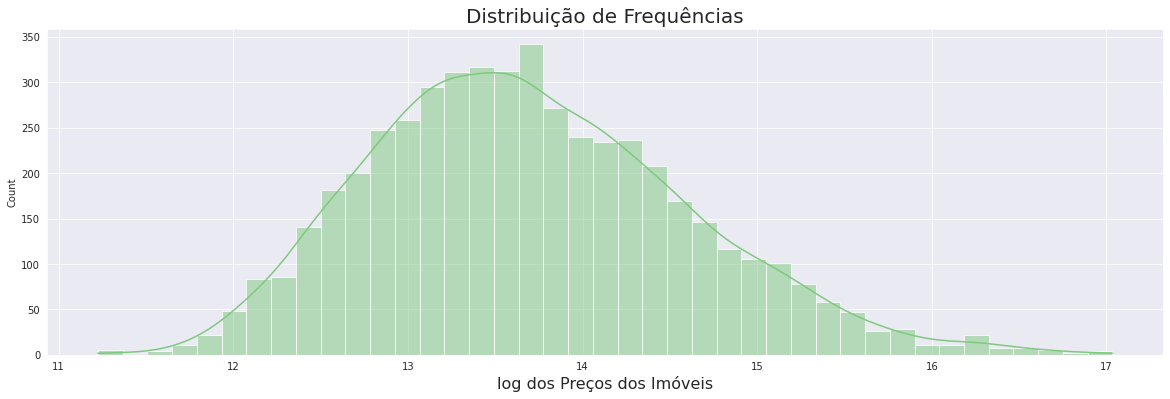

In [14]:
ax = sns.histplot(data=dados['log_Valor'], kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log dos Preços dos Imóveis', fontsize=16)

Com a variável dependente transformada, agora a distribuição está muito próxima de uma normal.

## Verificando Relação Linear

### Gráficos de dispersão entre as variáveis transformadas do dataset

Text(0.5, 1.05, 'Dispersão entre as Variáveis Transformadas')

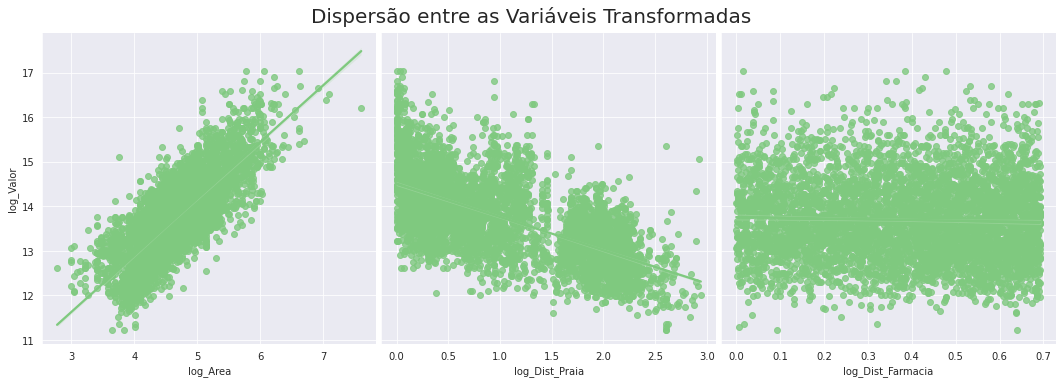

In [15]:
ax = sns.pairplot(data=dados, x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], y_vars='log_Valor', kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)

Agora, a reta de regressão se ajusta bem aos dados.

## Separando as features e labels

In [16]:
# Features
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

# Label
y = dados['log_Valor']

## Criando os Dataset de Treino e Teste

A separação em dados de treino e teste deve ser feita para conseguir avaliar o desempenho do modelo. Não pode treinar e testar o modelo com os mesmo dados, porque o modelo já vai conhecer os dados inserido, por isso, temos que testá-lo com dados que ele nunca viu para poder medir o seu desempenho real. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [18]:
print('O dataset de treino tem {} imóveis e o de teste tem {} imóveis'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino tem 4000 imóveis e o de teste tem 1000 imóveis


## Regressão Linear

A partir de uma análise de regressão é feito um estudo da dependência de uma variável (variável dependente) em relação a uma ou mais variáveis (variáveis explicativas), com o objetivo de estimar e/ou prever um valor médio para a variável dependente em termos dos valores conhecidos ou fixados das vairáveis explicativas.

### Estimando o modelo com statsmodels

In [19]:
# Adicionando uma coluna com um valor constante no dataset das features de treino
X_train_com_constante = sm.add_constant(X_train)

In [20]:
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


## Avaliando o Modelo Estimado

In [21]:
# Criando o modelo de regressão linear
# OLS -> Método dos mínimos quadrados ordinário
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [22]:
# Estatísticas de teste do modelo
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:06:13   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se a Prob(F-statistic) > 0.05 significa que a regressão não é boa e que será necessário rever o modelo, porque há algo errado cmo ele. Aqui, como esse valor é menor que 0.05, a regressão como um todo é boa, ou seja, o ajuste é estatisticamente significativo.

A mesma coisa vale para P > |t|, só que aqui, ele serve para analisar cada parâmetro individualmente, avaliando se ele é estatisticamente significativo para o modelo.

Como é possível observar, a distância até a farmácia não é estatisticamente significativa, porque se valor é de 0.603, portanto, essa variável não explica o modelo (não tem impacto significativo no valor do imóvel), então, é preciso estimar um novo modelo sem essa variável.

## Modificando o Modelo e Avaliando Novamente o Ajuste

### Novo conjuntos de variáveis explicativas (X)

In [23]:
# Features
X = dados[['log_Area', 'log_Dist_Praia']]

### Criando os datasets de treino e teste

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

### Estimando o modelo com o statsmodels

In [25]:
X_train_com_constante = sm.add_constant(X_train)

In [26]:
# Treinando o modelo
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

### Avaliando as estatísticas de teste do novo modelo

In [27]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:06:13   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

Analisando os resultados, chega-se a conclusão de a regressão de um modo geral é boa e que todos os parâmetros considerados no modelo (log_Area e log_Dist_Praia) são estitisticamente significativos.

## Estimando o Modelo com os Dados de Treino

Utilizando a biblioteca scikit-learn.

In [28]:
# Instanciando a classe LinearRegression()
modelo = LinearRegression()

In [29]:
# Treinando o modelo
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de determinação (R²) do modelo estimado com os dados de treino

**O que é o coeficiente de determinação?**

É uma medida que diz quanto a linha de regressão se ajusta aos dados, sendo que o seu valor varia entre 0 e 1 e quanto mais próximo de 1, mais a linha está ajustada aos dados.

In [30]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


Como pode-se ver, é o mesmo resultado obtido utilzando o statsmodels, porque fizemos a mesma coisa, de difentes formas. Utilizando o sklearn, isso é feito de maneira mais direta, não precisa criar uma coluna de constantes, basta instanciar o modelo e treiná-lo com os dados de treino.

### Gerando previsões com os dados de teste

In [31]:
y_previsto = modelo.predict(X_test)

### Coeficiente de determinação para as previsões do modelo

In [32]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


Mede quanto os valores previstos pelo modelo se aproximam do valor real.

## Obtendo Previsões Pontuais

In [33]:
# Dados de entrada
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [34]:
# Previsão 
modelo.predict(entrada)[0]

14.28482006184788

O valor previsto está em log, então, é preciso fazer o processo inverso para o obter o valor real.

In [35]:
# Invertendo a transformação para obter a estimativa real do valor
np.exp(modelo.predict(entrada)[0])

1598889.784779439

### Criando um simulador simples

In [36]:
Area = 100
Dist_Praia = 0.1
# Precisa passar os valores para log para entrar no modelo
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

# Para retornar o valor real (em reais) é preciso fazer o processo inverso do log
print('R$ {0: .2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$  1412379.10


## Interpretação dos Coeficientes Estimados

### Obtendo o intercepto do modelo

**O que é intercepto?**

O intercepto representa o efeito médio na variável dependente tendo todas as variáveis explicativas excluídas do modelo, em outras palavras, independentemente de qual for o valor das variáveis explicativas, retorna o valor médio esperado da variável dependente. Na prática, os valores variáveis explicativas serão considerados iguais a zero.

In [37]:
modelo.intercept_

9.334916409800329

In [38]:
# Convertendo para o valor real
np.exp(modelo.intercept_)

11326.681428069842

### Obtendo os coeficiente de regressão

**O que são os coeficientes de regressão?**

São conhecidos também como coeficientes parciais angulares. Mede o efeito de cada uma das variáveis explicativas individualmente na variação do valor de Y. Para ficar mais claro, se deseja saber o coeficiente de regressão da área, o valor de distância da praia permanecerá constante e será avaliado o efeito em Y variando em uma unidade somente a área.

In [39]:
# log_Area, log_Dist_Praia
modelo.coef_

array([ 1.05807818, -0.49061226])

In [40]:
# Confirmando a oredem das variáveis explicativas
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

### Criando um DataFrame para armazenar os coeficientes do modelo

In [41]:
index = ['Intercepto', 'log Área', 'log Distância até Praia']

In [42]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área,1.058078
log Distância até Praia,-0.490612


**Interpretação dos Coeficientes Estimados**

* O efeito médio no preço dos imóveis 
excluindo o efeito das variáveis explicativas seria de R$ 11.326,68 (exp[Intercepto]);
* Mantendo a distância até a praia constante, se houver um aumento de 1% na área do imóvel, haverá em média um aumento de 1.06% no preço do imóvel;
* Mantendo a área do imóvel constante, um aumento de 1% na distância até a praia, causa em média uma diminuição de 0.49% no preço do imóvel.


## Análises Gráficas dos Resultados do Modelo

In [43]:
# Previsões do modelo para os dados de treino
y_previsto_train = modelo.predict(X_train)

### Gráfico de dispersão entre o valor estimado e o valor real

Text(0, 0.5, 'Real')

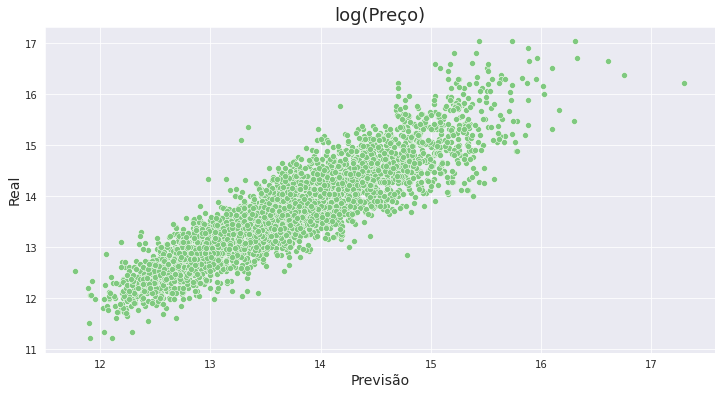

In [44]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('log(Preço)', fontsize=18)
ax.set_xlabel('Previsão', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

### Plotando a distribuição de frequências dos resíduos

**O que é resíduo?**

É a diferença entre o valor real e o valor previsto.

O gráfico de dispersão entre valor estimado e resíduo é um método informal de verificação da hipótese de variância constante de resíduos (homocedasticidade), a qual descreve que o erro (resíduo) é o mesmo em todos os valores das variáveis independentes, ou seja, em todos os pontos, a diferença entre o valor real e o valor previsto é o mesmo. Na prática, a variância não pode ser constante, porque isso seria um problema, mas ela deve ficar dentro de um intervalo.

In [45]:
residuo = y_train - y_previsto_train

Text(0.5, 0, 'log(Preço)')

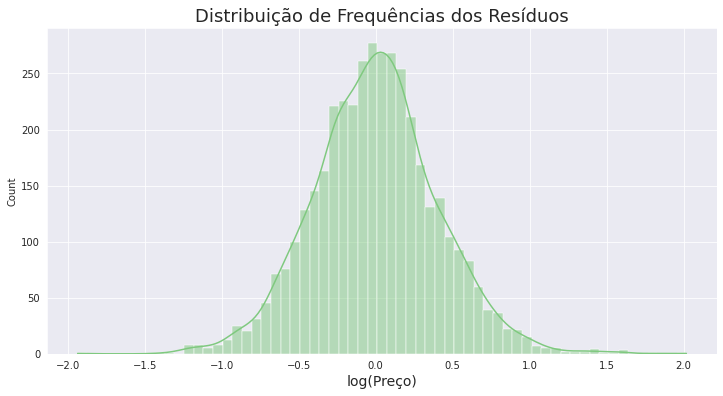

In [46]:
ax = sns.histplot(residuo, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log(Preço)', fontsize=14)

Os resíduos têm uma distribuição normal.

## Salvando o Modelo Estimado

Para salvar o modelo estimado será utilizado o módulo pickle, o qual implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.

O **Pickle** é útil para salvar identificadores e configurações, ou seja, ele salva um arquivo para recuperação posterior.

Fonte: https://www.greelane.com/pt/ci%c3%aancia-tecnologia-matem%c3%a1tica/ci%c3%aancia-da-computa%c3%a7%c3%a3o/using-pickle-to-save-objects-2813661/

In [47]:
# Abre o output
output = open('modelo_valor_imovel', 'wb')
# Preenche o output
pickle.dump(modelo, output)
# Fecha o output
output.close()

Com isso, o modelo feito pode ser reutilizado em outros projetos, podendo ser carregado em outros notebooks.